In [1]:
import os

Загрузите нужные библиотеки:
    - pandas, numpy, matplotlib
    - pipelines, стандартизацию, линейную регрессию, гребневую и лассо регрессию с sklearn
    - также загрузите standart scaler, пайплайны и polynomial features

In [2]:

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline

Используйте магическую комманду в notebook чтобы активировать прорисовку matplotlib графиков

In [3]:
%matplotlib inline

Поставьте стиль matplotlib **'seaborn'**

In [4]:
plt.style.use('seaborn')

Данные по оценкам качества ресторанов<br>
Загрузите данные. Для этого используйте кодировку **ISO-8859-1**

In [5]:
dataset_path = '../zomato-restaurants-data'

In [6]:
path_to_file = os.path.join(dataset_path, 'zomato.csv')

In [7]:
df = pd.read_csv(path_to_file, encoding='ISO-8859-1')

**Также загрузите названия стран и обьедините оба фрейма по полю "Country Code"**

In [8]:
country_df = pd.read_excel(os.path.join(dataset_path, 'Country-Code.xlsx'))
df = pd.merge(df, country_df, on='Country Code')

**Отобразите описание (description) и информацию (information) об датафрейме:**

In [9]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
Restaurant ID           9551 non-null int64
Restaurant Name         9551 non-null object
Country Code            9551 non-null int64
City                    9551 non-null object
Address                 9551 non-null object
Locality                9551 non-null object
Locality Verbose        9551 non-null object
Longitude               9551 non-null float64
Latitude                9551 non-null float64
Cuisines                9542 non-null object
Average Cost for two    9551 non-null int64
Currency                9551 non-null object
Has Table booking       9551 non-null object
Has Online delivery     9551 non-null object
Is delivering now       9551 non-null object
Switch to order menu    9551 non-null object
Price range             9551 non-null int64
Aggregate rating        9551 non-null float64
Rating color            9551 non-null object
Rating text             9551 non-null o

In [10]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


**Посмотрим на первые 5 записей.**

In [11]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


Переименуйте колонку *'Aggregate rating'* в *'av_rating'*

In [12]:
df = df.rename(columns={'Aggregate rating': 'av_rating'})

Постройте графики показывающие 5 наиболее встречающихся а) страны б) города в датасете <br>
Соотвественно, у вас должно получиться 2 графика -- Если вы нарисуете их в одной фигуре это будет бонус балл (5)

In [13]:
countries_fr = df.groupby('Country')['Restaurant ID'].count().sort_values(ascending=False).head(5).reset_index()
cities_fr = df.groupby('City')['Restaurant ID'].count().sort_values(ascending=False).head(5).reset_index()

In [14]:
countries_fr

,Country,Restaurant ID
0,India,8652
1,United States,434
2,United Kingdom,80
3,UAE,60
4,South Africa,60


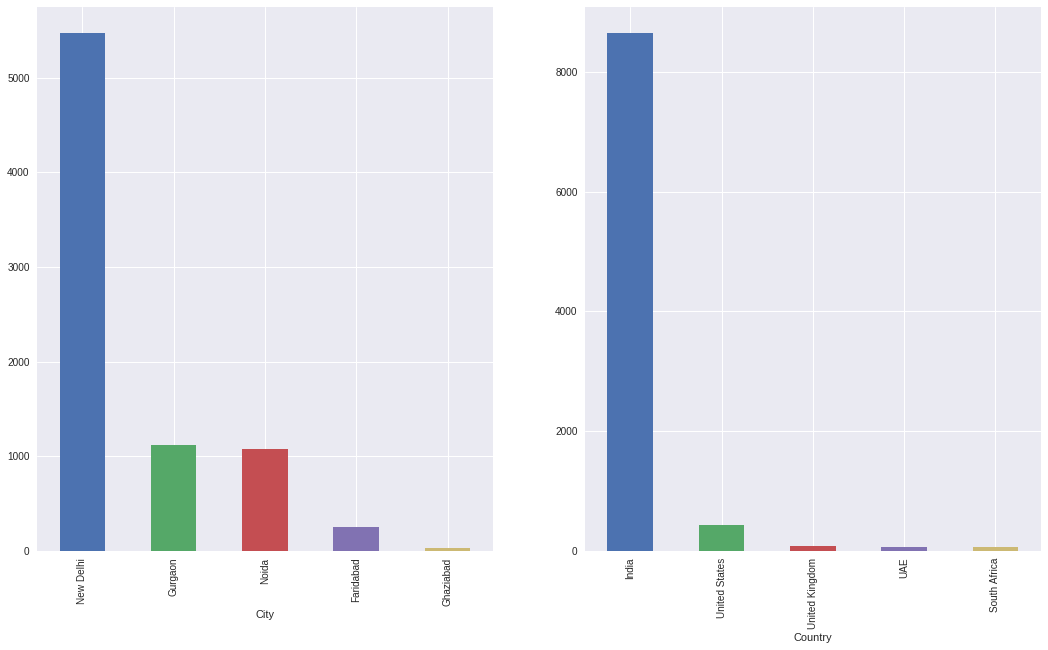

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(18, 10))
cities_fr.plot.bar(x='City', y='Restaurant ID', ax=ax[0], legend=False)
countries_fr.plot.bar(x='Country', y='Restaurant ID', ax=ax[1], legend=False);

Видно что большиство голосов сосредточено в определенной стране и городе - Что это за город и страна?

 - Индия - Нью Дели
 - США - Нью Дели
 - Британия - Сан-Фрациско
 - Австралия - Макати

In [16]:
###--- Ваш Ответ Тут ---

Датасет не совсем чистый. Рестораны которые не имеют оценку, в данных имеют оценку ноль.<br>
Это можно увидеть если узнать частоту показателей в колонке 'Rating text' для "нулевых" ресторанов<br>
**Покажите это**

In [17]:
df.loc[df['av_rating'] == 0, 'Rating text'].value_counts()

Not rated    2148
Name: Rating text, dtype: int64

Соотвественно в выбросьте данные которые не имеют оценку. Но надо сохранить их в отдельном датасете

In [18]:
forecast_df = df[df['av_rating'] == 0]

In [98]:
train_df = df[df['av_rating'] != 0]

Теперь постройте график на обучающей выборке - Средний рейтинг ресторанов по стране

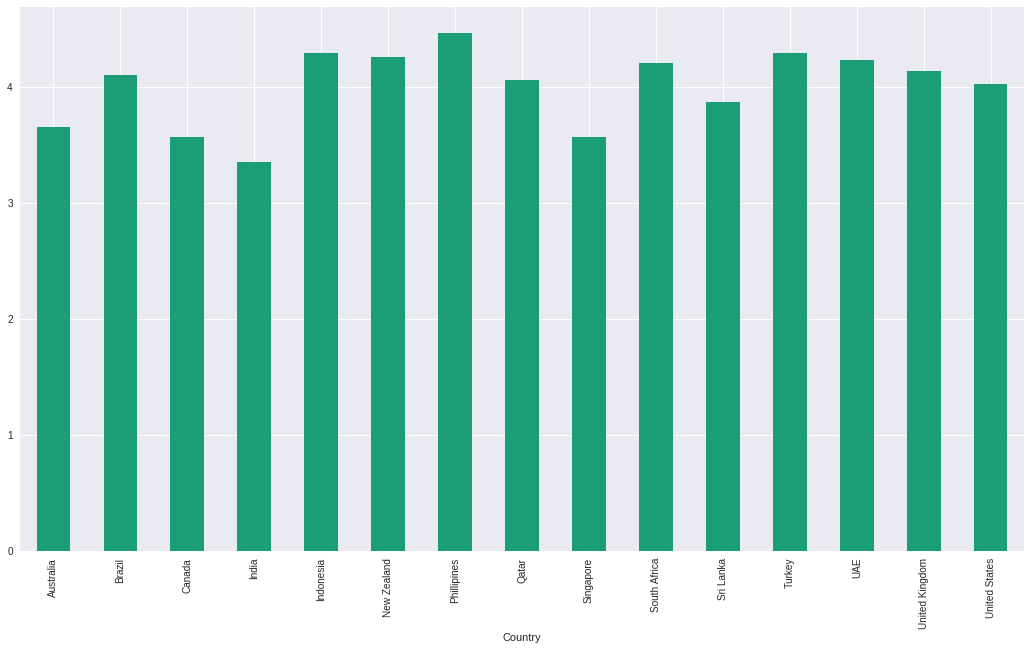

In [99]:
country_av_score = train_df.groupby('Country').av_rating.mean().reset_index()
fig, ax = plt.subplots(figsize=(18, 10))
country_av_score.plot.bar(x='Country', y='av_rating', ax=ax, cmap='Dark2', legend=False);

В обучающей выборке отсейте все рестораны не находящиеся в наиболее часто встречающемся городе

In [100]:
most_frequent_city = train_df.groupby('City')['Restaurant ID'].count().idxmax()

In [101]:
train_df = train_df[train_df.City == most_frequent_city]

Сохраните ваш фрейм в HDF5 файле с помощью метода to_hdf. Он понадобится вам позднее. Запишите его в папку **zomato-restaurants-data**

In [102]:
train_df.to_hdf(os.path.join(dataset_path, 'zomato_hdf.h5'),  key='train')

Стоит убрать из данных колонки *Rating color и Rating text* - Они могут дать утечку информации об av_rating <br>
Также стоит убрать колонку *Country, City, Country Code, Restaurant Name и Restaurant ID* как не несущую нужную информацию. <br>
И категориальные колонки со слишком большим количеством уникальных значений <br>
К тому же если использовать one-hot-encoding на таких фичах как *Restaurant ID*, то для новых ресторанов вы просто не сможете дать прогноз!

In [35]:
too_verbose_columns = (train_df.select_dtypes(include='O')
                               .columns[train_df.select_dtypes(include='O').nunique() > 2]
                               .tolist())

In [36]:
columns_to_drop = ['Rating color', 'Rating text', 'Country', 'City', 
                   'Country Code', 'Restaurant Name', 'Restaurant ID',]

In [37]:
columns_to_drop.extend(too_verbose_columns)

In [38]:
columns_to_drop = set(columns_to_drop)

In [39]:
train_df = train_df.drop(columns_to_drop, axis=1)

Теперь надо сделать преобразовать колонки с категориальными признаками в численные. Для этого используйте
функцию pd.get_dummies и метод select_dtypes

In [40]:
ohe_df = pd.get_dummies(train_df.select_dtypes(include='O'))

Теперь обьедините новые категориальные фичи с остальными числовыми данными

In [41]:
train_df = pd.concat([train_df.select_dtypes(exclude='O'), ohe_df], axis=1)

Проверьте размерность вашего фрейма. У вас **не** должны быть сотни колонок

In [42]:
train_df.shape

(4048, 14)

### Если вы ошиблись на этом этапе, то вся остальная дз будет неверно выполнена

In [44]:
y, X = train_df['av_rating'], train_df.drop('av_rating', axis=1)

Разделите данные на обучающую и тестовую выборку. Поставьте random_state = 123. Это зафиксирует ваше разбиение

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

**Сперва обучим обычную линейную регрессию. Не забудьте использовать пайплайны с и без стандартизации. <br>
Заметили разницу?**

In [47]:
lr = make_pipeline(StandardScaler(), LinearRegression())

In [48]:
lr.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [49]:
lr.score(X_train, y_train)

0.20736763032173255

In [50]:
lr.score(X_test, y_test)

0.23312565771425064

Результаты не впечатляют -- пока. Добавим Polynomial Features попробуйте degree = 2

In [51]:
lr_pol = make_pipeline(StandardScaler(), PolynomialFeatures(2), LinearRegression())

In [52]:
lr_pol.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [53]:
lr_pol.score(X_train, y_train)

0.29078201733522158

In [54]:
lr_pol.score(X_test, y_test)

0.30344465821541244

# <center> Cеребро

## Lasso-регрессия

Lasso-регрессия решает задачу минимизации среднеквардатичной ошибки с L1-регуляризацией:
$$\Large Loss = \frac{1}{2} \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d |w_i|$$

где $y = w^Tx$ – уравнение обычного OLS, зависящее от параметров модели $w$, $\ell$-число объектов в выборке $X$, $d$ – число признаков, $y$ – значения целевого признака, $\alpha$ – коэффициент регуляризации.

**Обучим Lasso-регрессию и на кросс-валидации выберем для алгоритма лучший коэффициент регуляризации. <br>
Поставьте random state  123, max_iter 1500 и n_alphas 100**

In [62]:
lasso_cv = make_pipeline(StandardScaler(), PolynomialFeatures(3), 
                         LassoCV(n_alphas=100, cv=5, random_state=123, max_iter=1500, n_jobs=-1))

In [63]:
%%time
lasso_cv.fit(X_train, y_train)

CPU times: user 4.58 s, sys: 2.36 s, total: 6.94 s
Wall time: 2 s


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('lassocv', LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1500, n_alphas=100, n_jobs=-1, normalize=False,
    positive=False, precompute='auto', random_state=123,
    selection='cyclic', tol=0.0001, verbose=False))])

In [64]:
lasso_cv.score(X_train, y_train)

0.27616959069114333

In [65]:
lasso_cv.score(X_test, y_test)

0.29003026293068601

**Теперь определим лучшее значение $\alpha$ в процессе кросс-валидации.**

In [66]:
lasso_cv.steps[-1][1].alpha_

0.021354166959182498

Сколько ненулевых коэфициентов у нас в регресии?

In [68]:
(lasso_cv.steps[-1][1].coef_ > 0).sum()

22

## Ridge-регрессия

Ridge-регрессия (или гребневая регрессия) решает задачу минимизации среднеквардатичной ошибки с L2-регуляризацией:
$$\Large Loss = \frac{1}{2} \sum_{i=1}^\ell {(y_i - w^Tx_i)}^2 + \alpha \sum_{i=1}^d w_i^2$$

где $y = w^Tx$ – уравнение обычного OLS, зависящее от параметров модели $w$, $\ell$-число объектов в выборке $X$, $d$ – число признаков, $y$ – значения целевого признака, $\alpha$ – коэффициент регуляризации.

Количесто $\alpha$  у вас должно быть 100, они должны быть распределены нормально по лог шкале от -2 до 6.
Для этого используйте функцию np.logspace

In [95]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

In [86]:
ridge_cv = make_pipeline(StandardScaler(), PolynomialFeatures(3), 
                         RidgeCV(alphas=ridge_alphas))

In [87]:
ridge_cv.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridgecv', RidgeCV(alphas=array([  1.00000e-02,   1.09699e-02, ...,   9.11589e+05,   1.00000e+06]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False))])

In [88]:
ridge_cv.score(X_train, y_train)

0.30577199977844749

In [89]:
ridge_cv.score(X_test, y_test)

0.31287915007552458

In [90]:
ridge_cv.steps[-1][1].alpha_

554.26645206631076

**В случае Ridge-регрессии никакие праметры не зануляются – они могут быть очень малыми, но не нулевыми.**

Посчитайте количество ненулевых коэфициентов. 

In [91]:
(ridge_cv.steps[-1][1].coef_ > 0).sum()

186

Насколько больше ненулевых коэфициентов в Ridge регресии?

In [93]:
#--Ваш ответ тут --

In [94]:
186 - 22

164

# <center> Золото

Пока наилучший $R^2$ в регресии на тестовой выборке у нас был не более **32%**, если вы сможете поднять его до **35%** то вы выполните эту часть!

In [96]:
# -- Ваш код здесь -- 